# Twitter Sentiment Analysis

### Matthew G. Copple
---

## Methodology

- Collected 100 tweets from 5 media outlets: BBC World News, CBS News, CNN, Fox News, New York Times
- Analyzed sentiment of tweet text using VADER
- Plotted individual compound sentiments across the 100 tweets and an overall analysis of sentiment that represented the mean of the 100 tweets collected for each outlet.

## Observations
- Across 100 tweets (admittedly, a very small sample over a limited time), the overall sentiment for the outlets is very close to neutral (0). The samples were run several times a day over the course of a week and always averaged between +0.1 and -0.1 (and usually, stayed between +.05 and -.05, an even narrower range). 
- When all tweets are plotted, the sentiments are distributed across the full distance of +1.0 to -1.0. However, it is very clear from looking at the neutral line (0 and immediately above and below it) that there is a trend toward neutral.
- Although the overall sentiment was close to neutral, the majority of outlets trended on the negative side of neutral, those which outlets trended negative changed depending on the sampling. This is likely because of the very small sample size taken.
- Anecdotally, I have heard many consumers, of all political backgrounds, claim that they feel the media is a negative influence. This sample, though small, tends to belie that claim. While the tweets do seem to trend ever-so-slightly negative, all of the samples the author has taken over the last week have hovered closely around neutral sentiment -- if negative, it was by less than a tenth, as noted above, and several dozen samples were taken over about a seven-day period. The author feels that further study should be undertaken on much larger samples over a longer period of time, to determine if the trends he has observed hold.

In [1]:
# Dependencies
import tweepy
from collections import defaultdict
from config import consumer_key, consumer_secret, access_token, access_token_secret
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret


In [3]:
#functions

#Tweepy Functions
def setup_connection(consumer_key, consumer_secret, access_token, access_token_secret):
    """
    Setup Tweepy connection, authenticate and return api object
    """
    # Twitter Credentials
    print("setting up connection...")
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
    return api

def grab_tweets(api, target_user, number_of_tweets):
    """
    Pull number_of_tweets for target_user
    """
    print(f'grabbing tweets for {target_user}...')
    return api.user_timeline(target_user, count=number_of_tweets)

#Sentiment Analysis Functions
def analyze_tweets(tweet, data, index):
    """
    Analyze each tweet text for polarity and append to a dictionary
    """
    # Run Vader Analysis on each tweet
    results = analyzer.polarity_scores(tweet["text"])
    data["Handle"].append(tweet["user"]["screen_name"])
    data["Date"].append(tweet["created_at"])
    data["Compound"].append(results["compound"])
    data["Positive"].append(results["pos"])
    data["Neutral"].append(results["neu"])
    data["Negative"].append(results["neg"])
    data["Tweets Ago"].append(index + 1)
    data["Tweet Text"].append(tweet["text"])
    return data
    
def create_dataframe(data):
    """
    import data (dictionary) into a pandas dataframe
    """
    result_df = pd.DataFrame(data)
    result_df = result_df[['Handle', 'Date', 'Compound', 'Positive', 'Neutral', 'Negative', 'Tweet Text',
                           'Tweets Ago']]
    return result_df

def build_compound_sentiment_list(dataframe, handle):
    """
    pull rows matching handle to build a list of compound sentiments for charting
    """
    return dataframe.loc[dataframe['Handle'] == handle]

def convert_to_display_date(date):
    """
    Convert date to mm/dd/ccyy format for charting
    """
    return datetime.strptime(date,'%a %b %d %H:%M:%S +0000 %Y').strftime('%m/%d/%Y')

def create_aggregate_sentiment(dataframe):
    """
    return the mean of numeric fields in dataframe
    """
    return dataframe.mean()

# graphing functions
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if height > .03:
            label_loc = 1.5*height
        elif height > -.999:
            label_loc = .03
        else:
            label_loc = 1.5*height
            
            
        ax.text(rect.get_x() + rect.get_width()/2., label_loc,
                '%s' % "{:.2f}".format(height),
                ha='center', va='bottom', family='ARIAL', fontsize = 14)

In [4]:
#initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#Twitter handles to be queried
handles = ['@CNN', '@BBCWorld', '@FoxNews', '@CBSNews', '@nytimes']

# Variables for holding sentiments
sentiments = defaultdict(list)

#authenticate with Tweepy and grab api object
api = setup_connection(consumer_key, consumer_secret, access_token, access_token_secret)

for handle in handles:
    public_tweets = grab_tweets(api, handle, 100)
    print(f'Analyzing tweets for {handle}...')
    for index, tweet in enumerate(public_tweets):
        # Run Vader Analysis on each tweet
        sentiments = analyze_tweets(tweet, sentiments, index)

print('----------------------------')        
print('| TWEET ANALYSIS COMPLETED |')
print('----------------------------')

#create a tweet sentiment dataframe
tweet_sentiment_df = create_dataframe(sentiments)

#save dataframe as a csv file
tweet_sentiment_df.to_csv('output/tweet_sentiment_analysis.csv')

    
    

setting up connection...
grabbing tweets for @CNN...
Analyzing tweets for @CNN...
grabbing tweets for @BBCWorld...
Analyzing tweets for @BBCWorld...
grabbing tweets for @FoxNews...
Analyzing tweets for @FoxNews...
grabbing tweets for @CBSNews...
Analyzing tweets for @CBSNews...
grabbing tweets for @nytimes...
Analyzing tweets for @nytimes...
----------------------------
| TWEET ANALYSIS COMPLETED |
----------------------------


In [5]:
# build dataframes of tweets for each handle
cnn_compound = build_compound_sentiment_list(tweet_sentiment_df,'CNN')
bbc_compound = build_compound_sentiment_list(tweet_sentiment_df,'BBCWorld')
fox_compound = build_compound_sentiment_list(tweet_sentiment_df,'FoxNews')
cbs_compound = build_compound_sentiment_list(tweet_sentiment_df,'CBSNews')
nyt_compound = build_compound_sentiment_list(tweet_sentiment_df,'nytimes')

#build dataset of mean values using the handle lists from the above step
cnn_compound_agg = create_aggregate_sentiment(cnn_compound)
bbc_compound_agg = create_aggregate_sentiment(bbc_compound)
fox_compound_agg = create_aggregate_sentiment(fox_compound)
cbs_compound_agg = create_aggregate_sentiment(cbs_compound) 
nyt_compound_agg = create_aggregate_sentiment(nyt_compound)

#convert createdate of first tweet to mm/dd/yyyy format for display on graphs
record_date = convert_to_display_date(tweet_sentiment_df['Date'][0])

## Sentiment Analysis of Media Tweets

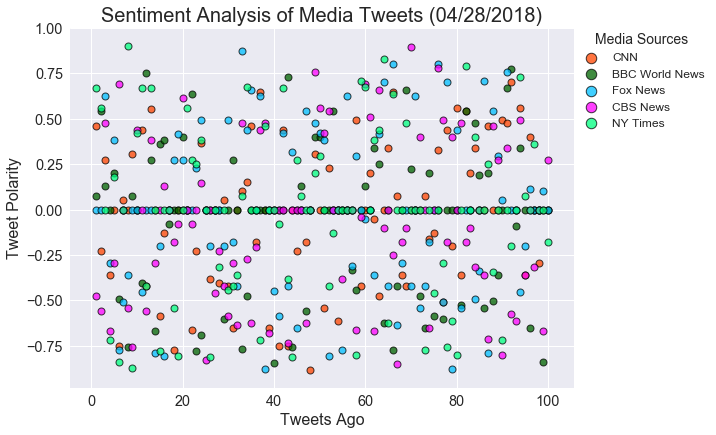

In [6]:
#use seaborn default styling
sns.set()
#bubble chart
fig, ax = plt.subplots(figsize=(10,10))
#create scatterplots from dataframes
ax.scatter(cnn_compound['Tweets Ago'],cnn_compound['Compound'], 
                        facecolors='orangered', edgecolors='black', alpha=0.75,
                        label='CNN',linewidth=1.0)
ax.scatter(bbc_compound['Tweets Ago'],bbc_compound['Compound'], 
                        facecolors='darkgreen', edgecolors='black', alpha=0.75,
                        label='BBC World News',linewidth=1.0)
ax.scatter(fox_compound['Tweets Ago'],fox_compound['Compound'], 
                        facecolors='deepskyblue', edgecolors='black', alpha=0.75,
                        label='Fox News',linewidth=1.0)
ax.scatter(cbs_compound['Tweets Ago'],cbs_compound['Compound'], 
                        facecolors='fuchsia', edgecolors='black', alpha=0.75,
                        label='CBS News',linewidth=1.0)
ax.scatter(nyt_compound['Tweets Ago'],nyt_compound['Compound'], 
                            facecolors='springgreen', edgecolors='black', alpha=0.75,
                            label='NY Times',linewidth=1.0)
#labels and legends
scatter_title = f'Sentiment Analysis of Media Tweets ({record_date})'
ax.set_position([0.1,0.1,0.7,0.5])
ax.set_title(scatter_title, fontsize = 20)
ax.set_xlabel("Tweets Ago", fontsize = 16)
ax.set_ylabel("Tweet Polarity", fontsize = 16)
ax.tick_params(labelsize = 'large')
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., prop={'size': 12}, markerscale=1.5)\
.set_title('Media Sources',prop={'size':14})
plt.savefig('output/sentiment_analysis_scatter.png')

plt.show()

## Overall Media Sentiment Based on Twitter

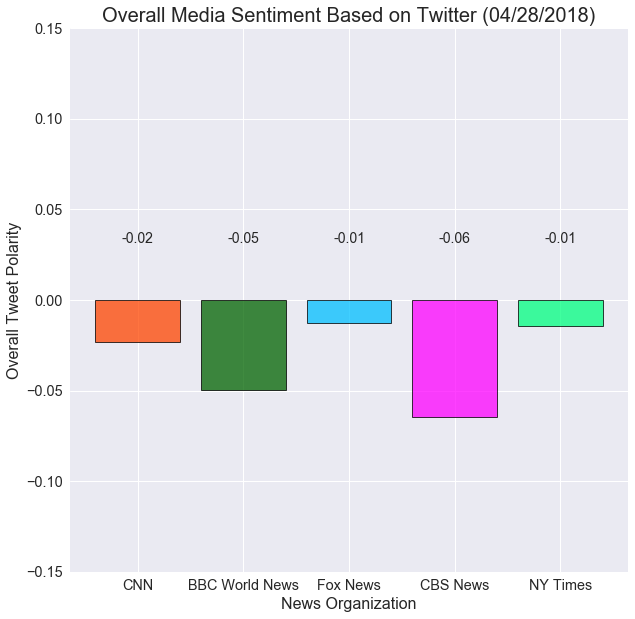

In [7]:
#bar chart
fig, ax = plt.subplots(figsize=(10,10))

    #create scatterplots from dataframes
rects1 = ax.bar('CNN',cnn_compound_agg['Compound'], 
                        color='orangered', edgecolor='black', alpha=0.75,
                        label='CNN',linewidth=1.0)
rects2 = ax.bar('BBC World News',bbc_compound_agg['Compound'], 
                        color='darkgreen', edgecolor='black', alpha=0.75,
                        label='BBC World News',linewidth=1.0)
rects3 = ax.bar('Fox News',fox_compound_agg['Compound'], 
                        color='deepskyblue', edgecolor='black', alpha=0.75,
                        label='Fox News',linewidth=1.0)
rects4 = ax.bar('CBS News',cbs_compound_agg['Compound'], 
                        color='fuchsia', edgecolor='black', alpha=0.75,
                        label='CBS News',linewidth=1.0)
rects5 = ax.bar('NY Times',nyt_compound_agg['Compound'], 
                        color='springgreen', edgecolor='black', alpha=0.75,
                        label='NY Times',linewidth=1.0)

#labels and legends
bar_title = f'Overall Media Sentiment Based on Twitter ({record_date})'
ax.set_title(bar_title, fontsize = 20)
ax.set_xlabel("News Organization", fontsize = 16)
ax.set_ylabel("Overall Tweet Polarity", fontsize = 16)
ax.tick_params(labelsize = 'large')
ax.set_ybound(.15, -.15)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
plt.savefig('output/overall_media_sentiment.png')

plt.show()